In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Настройка отображения
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8')
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Выбор столбца для анализа (N = 20, 6 столбец = Time_on_Education)
data = df['Time_on_Education']

In [40]:
N = 20
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
target_col = cols[N % 7]
print(target_col)

Time_on_Education


Time_on_Education - ДАННЫЕ



Задача1


I. БАЗОВЫЕ ХАРАКТЕРИСТИКИ РАСПРЕДЕЛЕНИЯ
Характеристика Значение
       Среднее   1.0163
     Дисперсия   0.4202
          Мода   0.0000
       Медиана   1.0000
            Q1   0.5000
            Q2   1.0000
            Q3   1.5000
    Асимметрия   0.3400
       Эксцесс  -0.4000
           IQR   1.0000


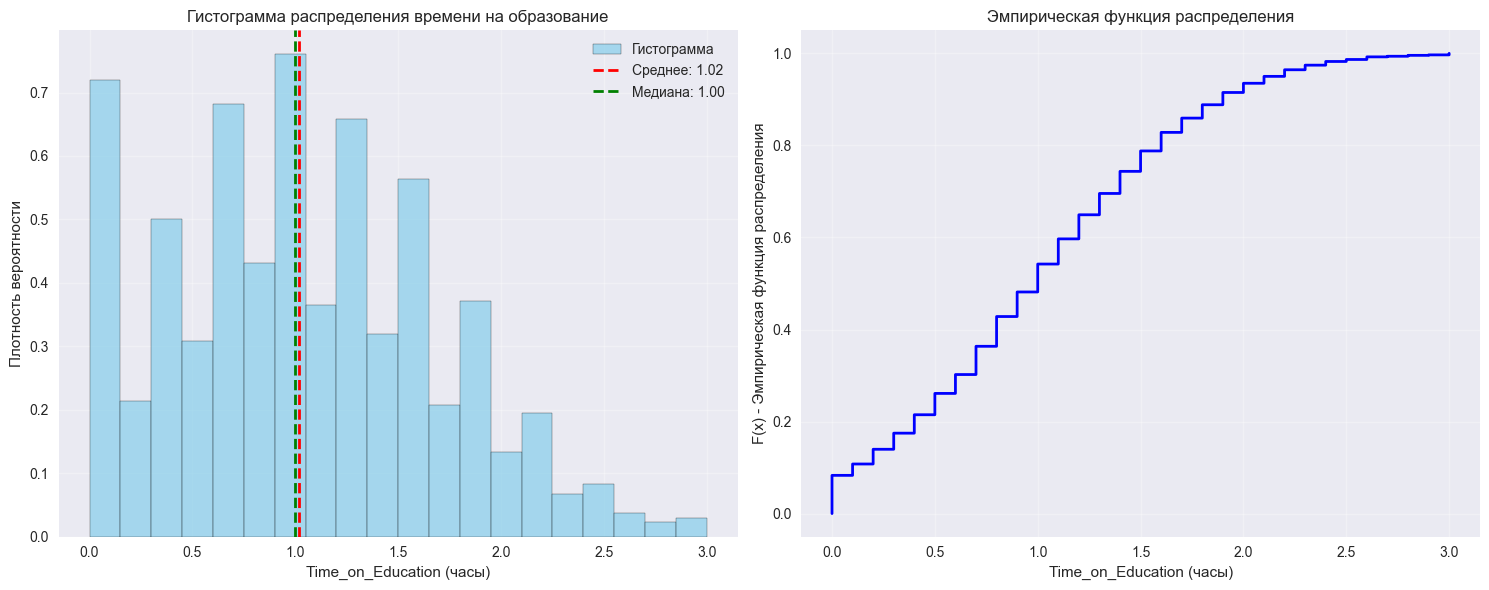

In [52]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

print("\n" + "="*50)
print("I. БАЗОВЫЕ ХАРАКТЕРИСТИКИ РАСПРЕДЕЛЕНИЯ")
print("="*50)

# Основные характеристики
mean_val = np.mean(data)
variance_val = np.var(data, ddof=0)
mode_val = stats.mode(data, keepdims=True).mode[0]   # <-- исправлено
median_val = np.median(data)
q1, q2, q3 = np.quantile(data, [0.25, 0.5, 0.75])
skew_val = stats.skew(data)
kurtosis_val = stats.kurtosis(data)
iqr_val = q3 - q1

# Создание таблицы с характеристиками
stats_df = pd.DataFrame({
    'Характеристика': ['Среднее', 'Дисперсия', 'Мода', 'Медиана', 
                      'Q1', 'Q2', 'Q3', 'Асимметрия', 'Эксцесс', 'IQR'],
    'Значение': [f"{mean_val:.4f}", f"{variance_val:.4f}", f"{mode_val:.4f}", 
                f"{median_val:.4f}", f"{q1:.4f}", f"{q2:.4f}", f"{q3:.4f}", 
                f"{skew_val:.4f}", f"{kurtosis_val:.4f}", f"{iqr_val:.4f}"]
})

print(stats_df.to_string(index=False))




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма с плотностью
ax1.hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')
ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
ax1.set_xlabel('Time_on_Education (часы)')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Гистограмма распределения времени на образование')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Эмпирическая функция распределения
sorted_data = np.sort(data)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.step(sorted_data, y_vals, where='post', color='blue', linewidth=2)
ax2.set_xlabel('Time_on_Education (часы)')
ax2.set_ylabel('F(x) - Эмпирическая функция распределения')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Среднее значение (1.0163) и медиана (1.0) почти совпадают, что говорит о практически симметричном распределении данных. Большинство учащихся тратят около 1 часа на образование.

Дисперсия (0.4202) относительно невелика, следовательно, значения мало разбросаны вокруг среднего — поведение учащихся в отношении времени на образование достаточно однородное.

Мода (0.0) показывает, что значительная часть учеников вообще не тратит времени на образовательные активности (возможно, из-за отсутствия учёбы в конкретный день или неверной самооценки времени).

Квантили Q1 = 0.5 и Q3 = 1.5 означают, что 50% учащихся тратят от 0.5 до 1.5 часов на образование в день.
Интерквартильный размах (IQR = 1.0) подтверждает, что диапазон колебаний основной массы данных сравнительно узкий.

Асимметрия (0.34) положительная — это говорит о слабом смещении распределения вправо: есть небольшое число учащихся, которые тратят заметно больше времени, чем среднее значение.

Эксцесс (-0.4) отрицательный, значит распределение более “приплюснутое” по сравнению с нормальным: наблюдается меньше выраженный пик и более “широкие” хвосты.




Задание 2


Проверка нормальности

хи-квадрат=3784.2094, критическое=68.6693, df=51
   → Отвергаем: распределение НЕ нормальное

Проверка по асимметрии/эксцессу: skew=0.3400, kurt=-0.4000
   Z_skew=7.60+0.00j, Z_kurt=-4.47+0.00j
   → Отвергаем: распределение НЕ нормальное


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2148: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray((x - loc)/scale, dtype=dtyp)


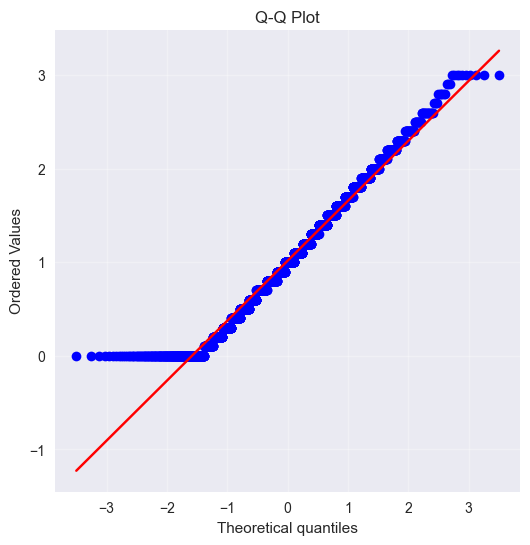

In [55]:
from scipy.stats import norm, chi2
from cmath import sqrt


def normality_tests(data, mean, var):
    print("\nПроверка нормальности")

    k = int(np.sqrt(len(data)))# Число интервалов
    bins = np.linspace(min(data), max(data), k+1) # Границы интервалов создание массива равномерно распределенных значений на указанном интервале.
    observed, _ = np.histogram(data, bins=bins)

    mu, sigma = mean, sqrt(var)
    expected = []
    for i in range(len(bins)-1):
        p = norm.cdf(bins[i+1], mu, sigma) - norm.cdf(bins[i], mu, sigma)
        expected.append(len(data)*p) # Для каждого интервала вычисляется вероятность попадания в него при нормальном распределении ()
    expected = np.array(expected)
    expected = np.where(expected == 0, 1e-10, expected)

    chi2_stat = np.sum((observed - expected) ** 2 / expected) # эмпирическая частота - observed, теор. частота - excepted
    df_chi2 = k - 3
    critical = chi2.ppf(0.95, df_chi2)
    print(f"\nхи-квадрат={chi2_stat:.4f}, критическое={critical:.4f}, df={df_chi2}")
    if chi2_stat > critical:
        print("   → Отвергаем: распределение НЕ нормальное")
    else:
        print("   → Принимаем: распределение нормальное")

    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    z_skew = skew / sqrt(6/len(data))
    z_kurt = kurt / sqrt(24/len(data))
    print(f"\nПроверка по асимметрии/эксцессу: skew={skew:.4f}, kurt={kurt:.4f}")
    print(f"   Z_skew={z_skew:.2f}, Z_kurt={z_kurt:.2f}")
    if abs(z_skew) <= 2 and abs(z_kurt) <= 2:
        print("   → Принимаем: распределение нормальное")
    else:
        print("   → Отвергаем: распределение НЕ нормальное")

    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.grid(alpha=0.3)
    plt.show()

normality_tests(data, mean_val, variance_val)
    


Задание 3


ОБРАБОТКА ДАННЫХ И ПРИБЛИЖЕНИЕ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ

 (без выбросов)
Характеристика Значение
       Среднее   1.0163
     Дисперсия   0.4202
          Мода   0.0000
       Медиана   1.0000
            Q1   0.5000
            Q2   1.0000
            Q3   1.5000
    Асимметрия   0.3400
       Эксцесс  -0.4000
           IQR   1.0000


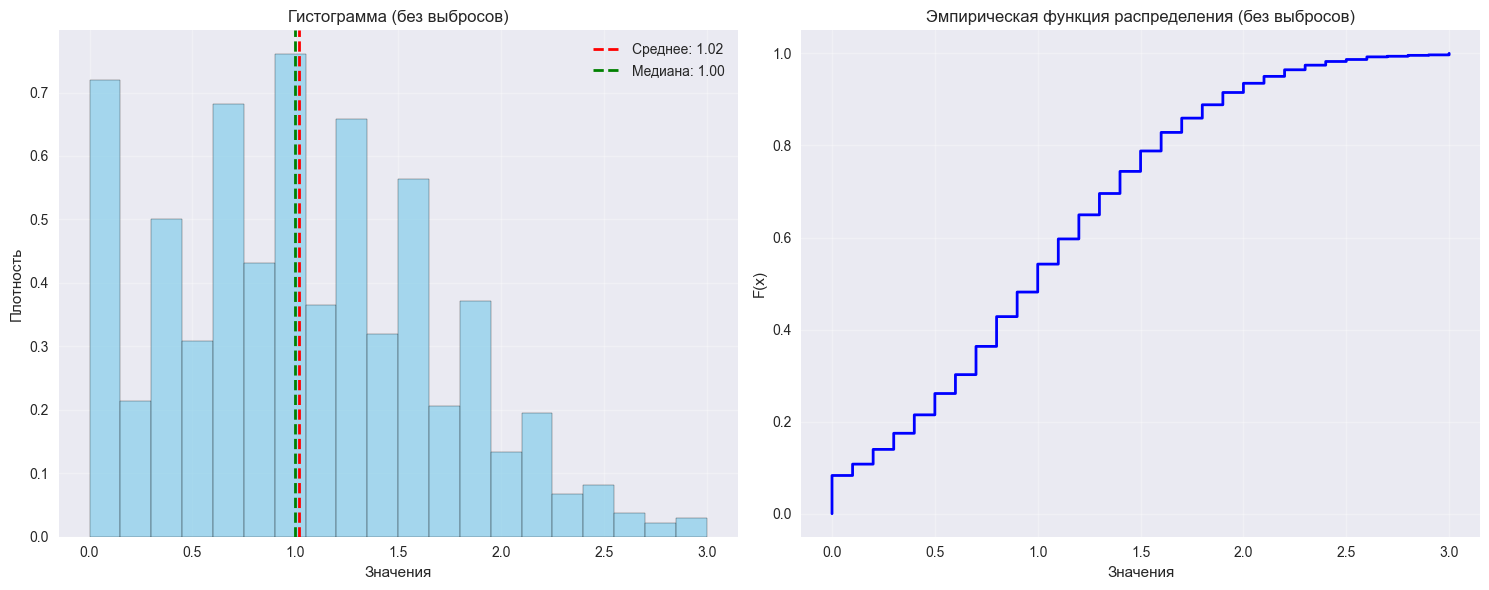


Проверка нормальности

хи-квадрат=3784.2094, критическое=68.6693, df=51
   → Отвергаем: распределение НЕ нормальное

Проверка по асимметрии/эксцессу: skew=0.3400, kurt=-0.4000
   Z_skew=7.60, Z_kurt=-4.47
   → Отвергаем: распределение НЕ нормальное


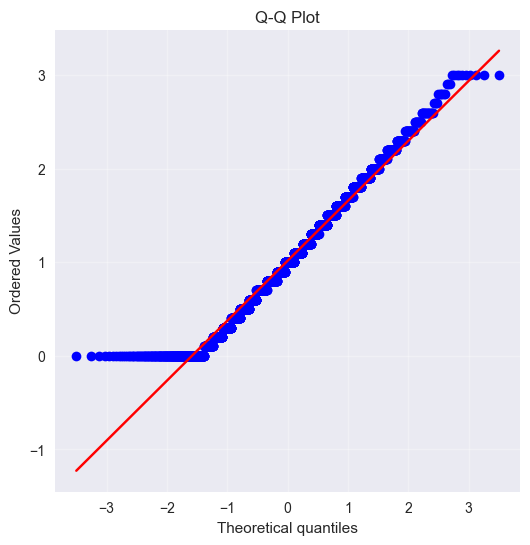


----------------------------------------------------------------------
Вывод: после метода 'без выбросов' распределение стало ближе к нормальному?

----------------------------------------------------------------------

 (после логарифмирования)
Характеристика Значение
       Среднее   0.6468
     Дисперсия   0.1136
          Мода   0.0000
       Медиана   0.6931
            Q1   0.4055
            Q2   0.6931
            Q3   0.9163
    Асимметрия  -0.3188
       Эксцесс  -0.6516
           IQR   0.5108


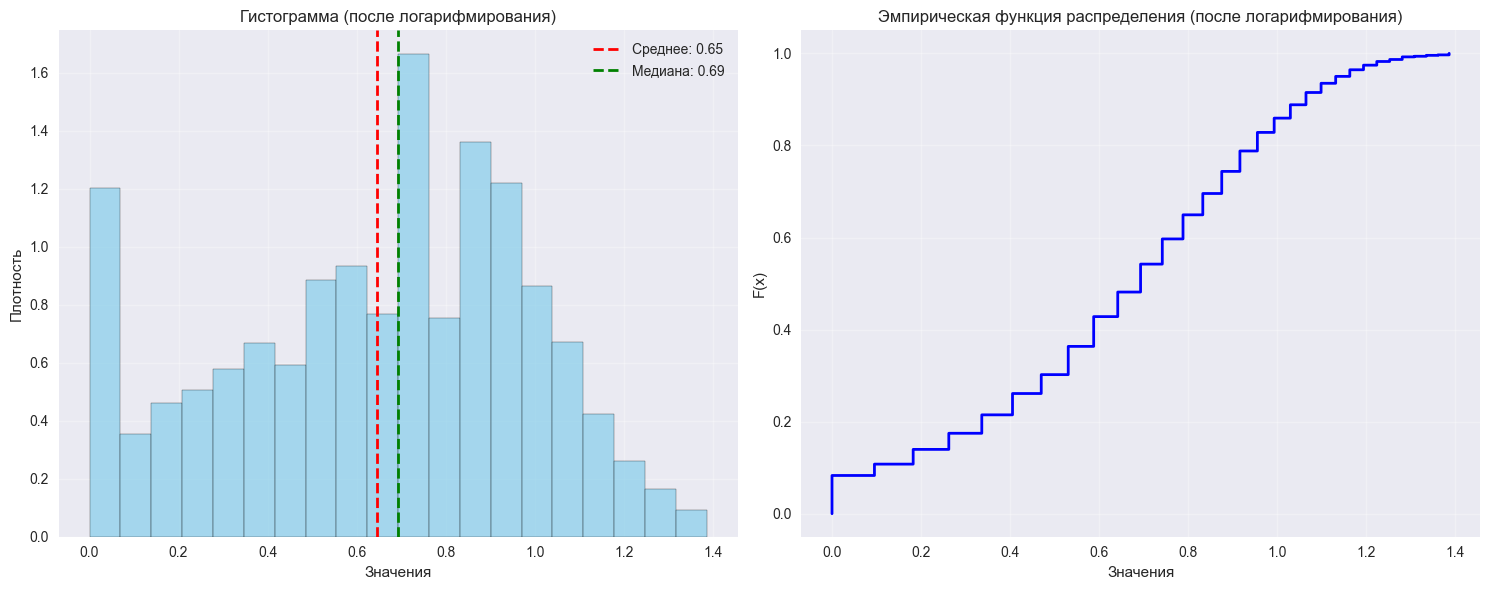


Проверка нормальности

хи-квадрат=6240.2417, критическое=68.6693, df=51
   → Отвергаем: распределение НЕ нормальное

Проверка по асимметрии/эксцессу: skew=-0.3188, kurt=-0.6516
   Z_skew=-7.13, Z_kurt=-7.29
   → Отвергаем: распределение НЕ нормальное


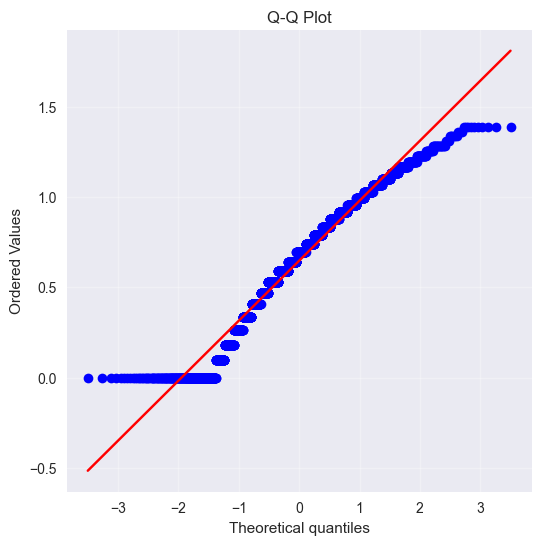


----------------------------------------------------------------------
Вывод: после метода 'после логарифмирования' распределение стало ближе к нормальному?

----------------------------------------------------------------------

 (стандартизированные)
Характеристика Значение
       Среднее   0.0000
     Дисперсия   1.0000
          Мода  -1.5679
       Медиана  -0.0252
            Q1  -0.7965
            Q2  -0.0252
            Q3   0.7461
    Асимметрия   0.3400
       Эксцесс  -0.4000
           IQR   1.5427


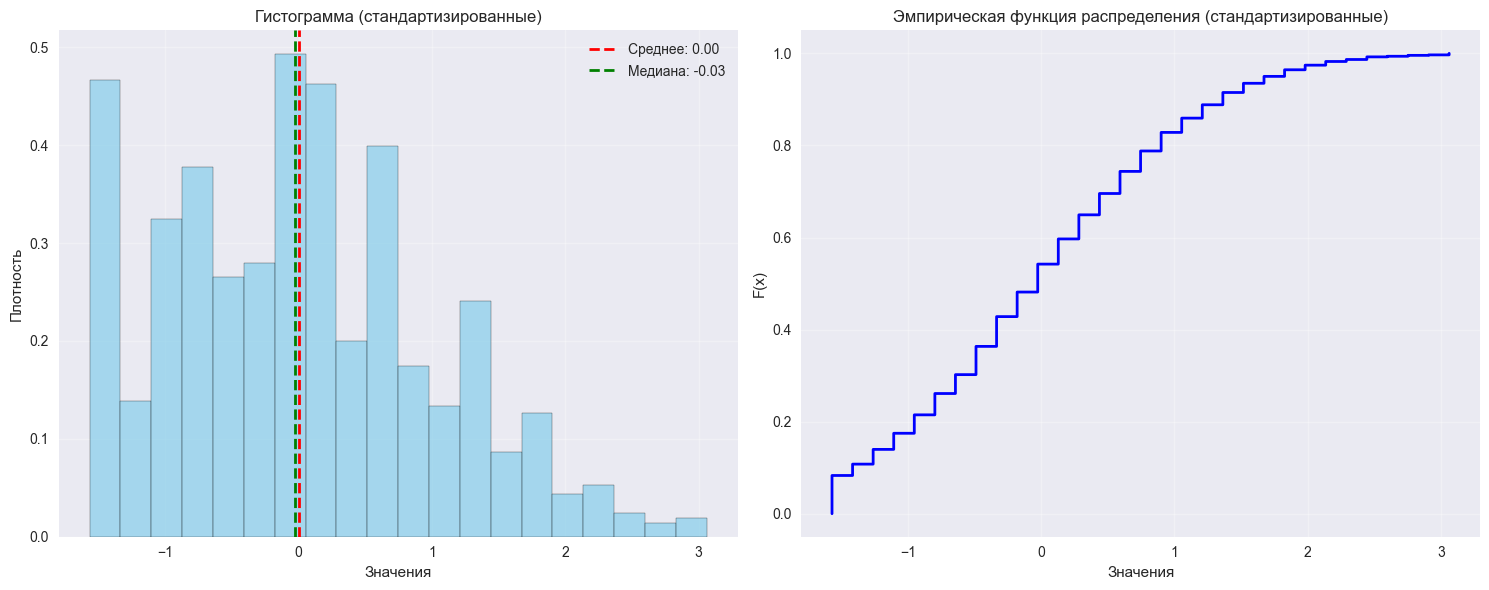


Проверка нормальности

хи-квадрат=3769.6333, критическое=68.6693, df=51
   → Отвергаем: распределение НЕ нормальное

Проверка по асимметрии/эксцессу: skew=0.3400, kurt=-0.4000
   Z_skew=7.60, Z_kurt=-4.47
   → Отвергаем: распределение НЕ нормальное


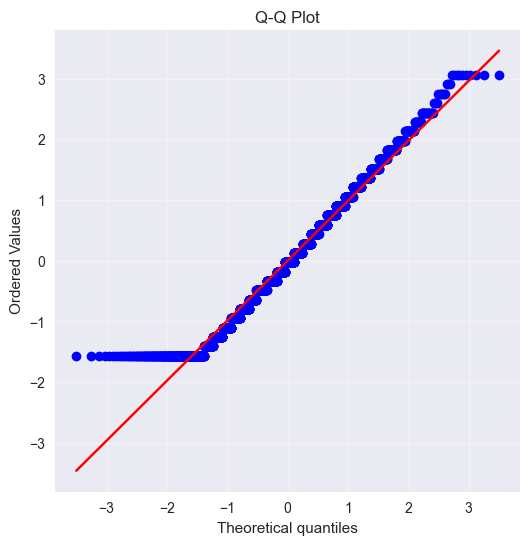


----------------------------------------------------------------------
Вывод: после метода 'стандартизированные' распределение стало ближе к нормальному?

----------------------------------------------------------------------


In [60]:

print("\n" + "="*80)
print("ОБРАБОТКА ДАННЫХ И ПРИБЛИЖЕНИЕ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ")
print("="*80)
from math import sqrt

def describe_and_plot(arr, title):
    """Расчёт характеристик и построение гистограммы и ЭФР"""
    print(f"\n {title}")
    mean_val = np.mean(arr)
    var_val = np.var(arr, ddof=0)
    mode_val = stats.mode(arr, keepdims=True).mode[0]
    median_val = np.median(arr)
    q1, q2, q3 = np.quantile(arr, [0.25, 0.5, 0.75])
    skew_val = stats.skew(arr)
    kurt_val = stats.kurtosis(arr)
    iqr_val = q3 - q1

    table = pd.DataFrame({
        "Характеристика": ['Среднее', 'Дисперсия', 'Мода', 'Медиана',
                            'Q1', 'Q2', 'Q3', 'Асимметрия', 'Эксцесс', 'IQR'],
        "Значение": [f"{mean_val:.4f}", f"{var_val:.4f}", f"{mode_val:.4f}",
                     f"{median_val:.4f}", f"{q1:.4f}", f"{q2:.4f}", f"{q3:.4f}",
                     f"{skew_val:.4f}", f"{kurt_val:.4f}", f"{iqr_val:.4f}"]
    })
    print(table.to_string(index=False))

    # --- построение графиков ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.hist(arr, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    ax1.set_title(f'Гистограмма {title}')
    ax1.set_xlabel('Значения')
    ax1.set_ylabel('Плотность')
    ax1.legend()
    ax1.grid(alpha=0.3)

    sorted_arr = np.sort(arr)
    F = np.arange(1, len(sorted_arr)+1) / len(sorted_arr)
    ax2.step(sorted_arr, F, where='post', color='blue', linewidth=2)
    ax2.set_title(f'Эмпирическая функция распределения {title}')
    ax2.set_xlabel('Значения')
    ax2.set_ylabel('F(x)')
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return mean_val, var_val


def transform_and_test(data, method):
    """Применяет преобразование и проверяет нормальность"""
    if method == "trim_outliers":
        q1, q3 = np.quantile(data, [0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        new_data = data[(data >= lower) & (data <= upper)]
        label = "без выбросов"
    elif method == "log":
        new_data = np.log1p(data)
        label = "после логарифмирования"
    elif method == "standardize":
        new_data = (data - np.mean(data)) / np.std(data)
        label = "стандартизированные"
    
    # Пункт I — описательная статистика + графики
    mean, var = describe_and_plot(new_data, f"({label})")

    # Пункт II — проверка нормальности
    normality_tests(new_data, mean, var)

    print("\n" + "-"*70)
    print(f"Вывод: после метода '{label}' распределение стало ближе к нормальному?\n")
    print("-"*70)


transform_and_test(data, "trim_outliers")
transform_and_test(data, "log")
transform_and_test(data, "standardize")

АНАЛИЗ РАСПРЕДЕЛЕНИЙ ВНУТРИ ГРУПП 'School_Grade'

Характеристики распределения по группам:
School_Grade  Среднее  Дисперсия  Количество
        10th 1.028542   0.448710         487
        11th 0.991649   0.409888         479
        12th 1.024008   0.400313         529
         7th 1.021328   0.418375         497
         8th 0.975311   0.423859         482
         9th 1.052662   0.422764         526


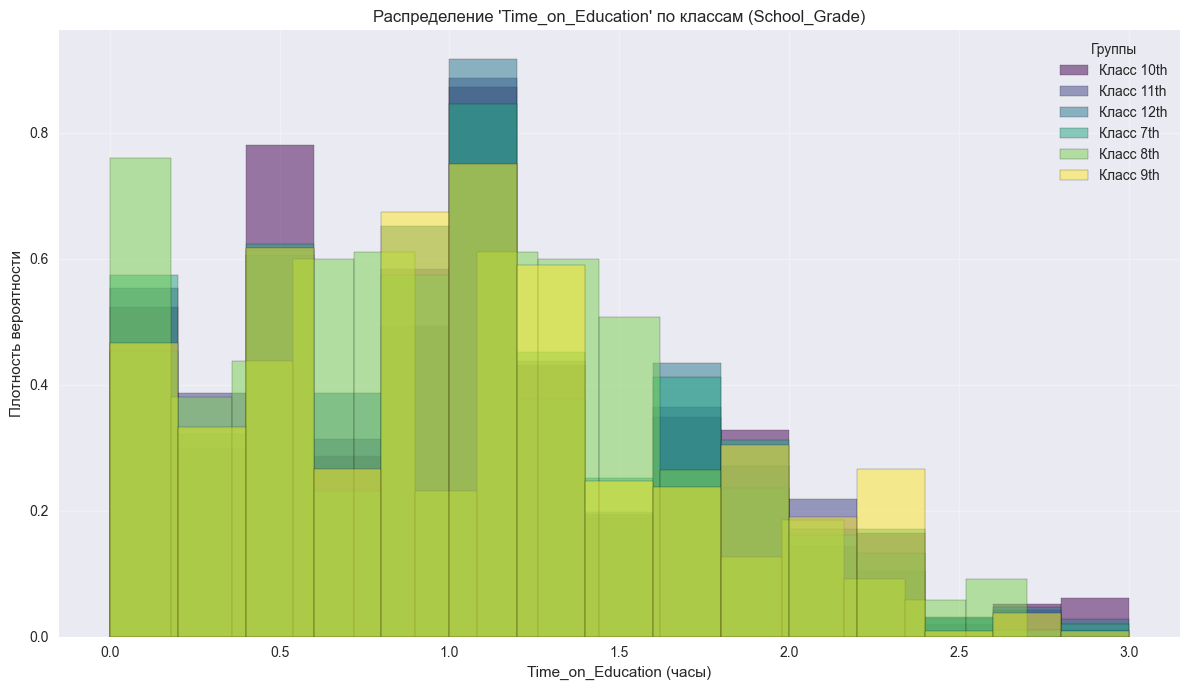


Выводы:
- Каждая гистограмма показывает, как распределено время, потраченное на образование, по классам.
- По таблице видно различие в средних и дисперсиях между возрастными группами.
- Если у старших классов выше среднее, это указывает на большую учебную нагрузку.
- Чем больше дисперсия — тем сильнее различия между учащимися внутри группы.


In [70]:
print("АНАЛИЗ РАСПРЕДЕЛЕНИЙ ВНУТРИ ГРУПП 'School_Grade'")


# Группировка по School_Grade
df = pd.read_csv('teen_phone_addiction_dataset.csv')
grouped = df.groupby('School_Grade')['Time_on_Education']

# Создаём таблицу со средним и дисперсией
group_stats = grouped.agg(['mean', 'var', 'count']).reset_index()
group_stats.rename(columns={'mean': 'Среднее', 'var': 'Дисперсия', 'count': 'Количество'}, inplace=True)

print("\nХарактеристики распределения по группам:")
print(group_stats.to_string(index=False))

# --- построение гистограмм для всех групп ---
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(group_stats)))

for (grade, values), color in zip(grouped, colors):
    plt.hist(values, bins=15, alpha=0.5, color=color, edgecolor='black', density=True, label=f'Класс {grade}')

plt.title("Распределение 'Time_on_Education' по классам (School_Grade)")
plt.xlabel("Time_on_Education (часы)")
plt.ylabel("Плотность вероятности")
plt.legend(title='Группы')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- вывод кратких интерпретаций ---
print("\nВыводы:")
print("- Каждая гистограмма показывает, как распределено время, потраченное на образование, по классам.")
print("- По таблице видно различие в средних и дисперсиях между возрастными группами.")
print("- Если у старших классов выше среднее, это указывает на большую учебную нагрузку.")
print("- Чем больше дисперсия — тем сильнее различия между учащимися внутри группы.")